## Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Импорт библиотек

In [80]:
# Т.к. столбец is_ultra - классификатор, нам потребуются модули - классификаторы
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

## Загрузка датасета

In [109]:
try:
    df = pd.read_csv('./datasets/users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')
print ('Размер датасета:', len(df))
df.head(5)

Размер датасета: 3214


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [110]:
#На всякий случай проверим сколько у нас значений с Ультра и без
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Количество строк достаточное для разработки модели.

In [122]:
#Есть смысл в конце сравнить результат с константой.
print ('Точность модели, которая = константе (0) = {:2.2%}'.format(len(df[df['is_ultra']==0])/len(df)))

Точность модели, которая = константе (0) = 69.35%


Т.к. в условии задания прописано, что предобработка не требуется, пропустим блок этот блок.

In [111]:
# Разделим выборки на тренировочную и валидационную в соотношении 1 к 3
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

## Модель "Решающее дерево"

In [112]:
best_depth = None
best_result = 0
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid) 
    if result > best_result_1:
        best_result_1 = result
        best_depth = depth
print('max_depth =',best_depth,':',best_result_1)

max_depth = None : 0.7885572139303483


Неплохо, наибольшая точность при использовании данного метода составила 78,85% при использовании глубины деревьев - 3

## Модель "Случайный лес"

In [113]:
best_model = None
best_result_2 = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # создаем модель
    model.fit(features_train,target_train) # обучаем модель
    result = model.score(features_valid,target_valid) # подсчет качества
    if result > best_result_2:
        bes_est = est
        best_result_2 = result
print('estimator =',bes_est,':',best_result_2)

estimator = 10 : 0.7898009950248757


Модель "Случайный лес" отработала лучше, точность составляет 78,98% это не намного выше, чем в первом случае. При этом мы знаем, что она более "тяжелая" и трудозатратна, поэтому модель решающее дерево лучше подойдет для случаев, когда обработка информации должна осуществляться максимально быстро

## Модель логическая регрессия

In [114]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train,target_train)
model.predict(features_valid) 
best_result_3 = model.score(features_valid, target_valid) 
print ('Точность модели при логической регрессии:', best_result_3)

Точность модели при логической регрессии: 0.7039800995024875


Логическая регрессия менее точно предсказывает ключевую метрику, поэтому остановимся на первых двух.

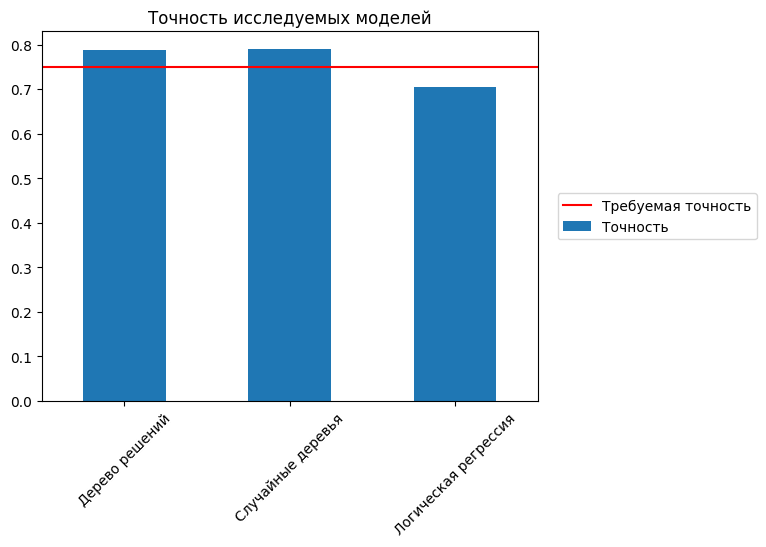

In [124]:
#Визуализируем итоговые значения
#df_results = {'Дерево решений': [best_result_1], 'Случайные деревья': [best_result_2], 'Логическая регрессия': [best_result_3]}
res = pd.DataFrame([best_result_1,best_result_2,best_result_3], index = ['Дерево решений','Случайные деревья','Логическая регрессия'],columns = ['Точность'])\
    .plot(kind = 'bar', rot = 45)
plt.axhline(y=0.75, color='r', linestyle='-', label = 'Требуемая точность')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Точность исследуемых моделей') 
plt.show()

## Выводы

* Наивысшая точность достигается в модели "Случайный лес" - 78,98%
* Второе место - модель "Дерево решений", точность чуть ниже - 78,85%, но зато она работает быстрее и ее тоже можно использовать в случаях, когда требуется скорость.
* Логическая регрессия сильно уступает по качеству первым двум моделям, поэтому для данного датасета использовать ее не стоит.
* Интересно, что константа в виде нуля практически соответствует модели логической регрессии...